In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv')
diabetes



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
X = diabetes.drop(['Pregnancies', 'Outcome'], axis = 1)

In [ ]:
# Replace 0 with nan
X.replace(0, np.nan, inplace=True)

X.isnull().sum()


Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
X['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [ ]:
# Skinthickness is discrete hence must be replaced by median
X['SkinThickness'].unique()


array([35., 29., nan, 23., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

In [ ]:
np.round(X['Insulin'].mean())

156.0

In [ ]:
X['Insulin'].replace(np.nan , np.round(X['Insulin'].mean()), inplace = True)

In [ ]:
X.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
# strategy : replace by mean, median, mode
impute = SimpleImputer( strategy = 'median' )
X_array = impute.fit_transform(X)


In [ ]:
X_array

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df = pd.DataFrame(X_array, columns = X.columns)


In [ ]:
diabetes_df['Pregnancies'] = diabetes.Pregnancies
diabetes_df['Outcome'] = diabetes.Outcome


In [ ]:
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0,1,1


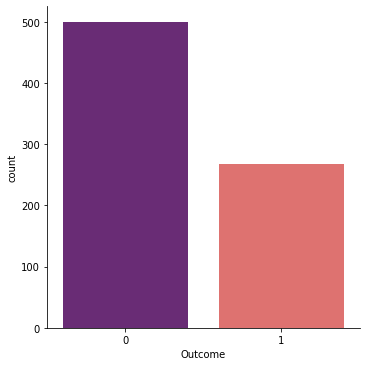

In [ ]:
sns.catplot(x = 'Outcome', kind = 'count', data = diabetes, palette='magma')


In [ ]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

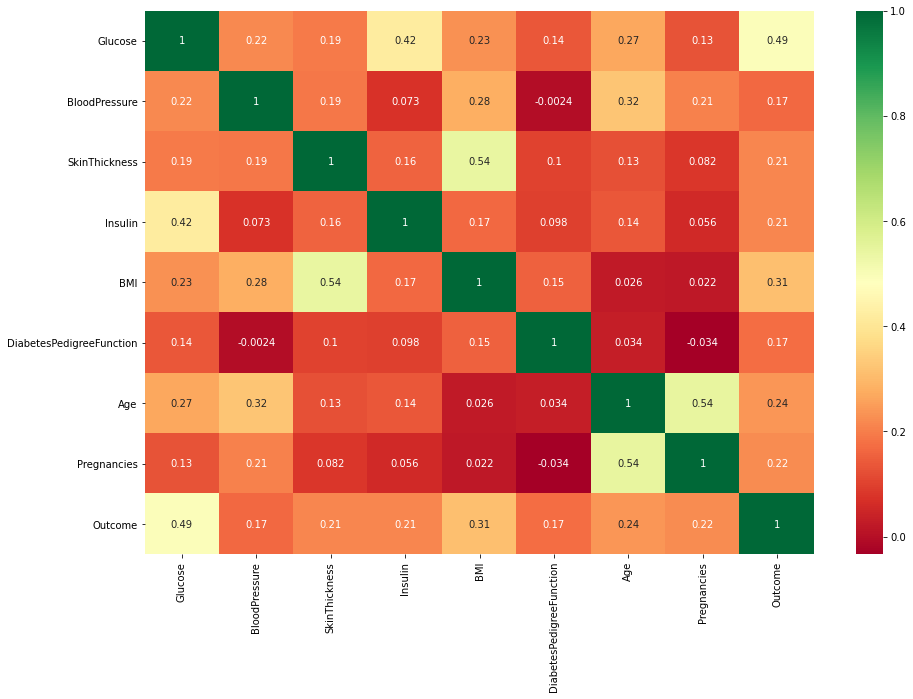

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(diabetes_df.corr(), annot = True, cmap = 'RdYlGn')


In [ ]:
X = diabetes_df.iloc[:, :-1]
Y = diabetes_df['Outcome']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

ANN Classification

In [ ]:
# Dense Layer in NN
from keras.layers import Dense
# Feedforeward NN
from keras.models import Sequential
# model optimizers for classification - SGD, Adagrad, Adam
from keras.optimizers import Adam

In [ ]:
def build_model():
  model = Sequential()
  # Input Layer
  model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units = 128, activation='relu'))
  # Hidden Layer - II
  model.add(Dense(units = 128, activation='relu'))

  # Output Layer
  # activation = sigmoid for binary class classification
  model.add(Dense(units = 1, activation='sigmoid'))

  # Optimizers - Adam
  # alpha or learning rate = 0.001

  optimizers = Adam(learning_rate= 0.001)

  # For Classification,  loss function - 'binary_crossentropy'
  # For multiclass-classification , loss function - 'categorical_crossentropy'

  model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

  return model

model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 25,537
Trainable params: 25,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 500, batch_size = 30, validation_split=0.20)

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,7.150516,0.507128,0.870018,0.617886
1,1.029448,0.619145,0.708026,0.658537
2,0.662711,0.686354,0.763030,0.674797
3,0.607052,0.708758,0.639424,0.699187
4,0.648948,0.676171,0.686568,0.682927
...,...,...,...,...
495,0.040248,0.987780,4.739319,0.699187
496,0.055098,0.979633,4.746779,0.707317
497,0.047468,0.989817,4.772966,0.682927
498,0.052556,0.979633,4.698791,0.699187


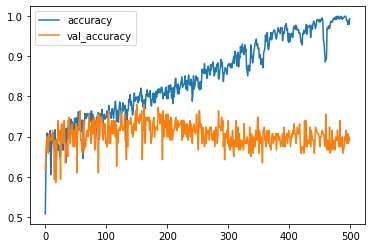

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 2ms/step - loss: 4.6603 - accuracy: 0.7273


[4.66032075881958, 0.7272727489471436]

**Confusion matrix**

In [ ]:
# sigmoid gives o/p in probability
predictions = model.predict(X_test)


In [ ]:
predictions

In [ ]:
yhat =np.round(predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test ,yhat)

array([[91, 18],
       [24, 21]])

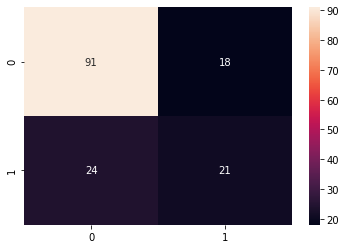

In [ ]:
sns.heatmap(confusion_matrix(Y_test ,yhat),annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       109
           1       0.54      0.47      0.50        45

    accuracy                           0.73       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154



In [ ]:
X_new = [[148.0,72.0,35.0,156.0,33.6,067.0,50.0,4]]

In [ ]:
model.predict(X_new)

array([[1.]], dtype=float32)